In [1]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv('./sample_data.csv')

In [16]:
df.head()

,PARTICIPANT_ID,PARTICIPANT_TZ,STUDY_ID,STUDY_NAME,STUDY_VERSION,SURVEY_ID,SURVEY_NAME,TRIGGER,EXPORT_TZ,START_END,...,DESK/COMPUTER_RT,INTENTION,INTENTION_RT,AWARENESS,AWARENESS_RT,THOUGHT_FOCUS,THOUGHT_FOCUS_RT,ACTIVITY,EFFORT,EFFORT_RT
0,64988952,UTC,FM2vyCURL,Treadmill questionnaire,4,dZCm_Jjha,treadmill pilot,scheduled,Australia/Sydney,0,...,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>
1,391004739,Australia/Melbourne,FM2vyCURL,Treadmill questionnaire,12,dZCm_Jjha,treadmill pilot,scheduled,Australia/Sydney,1,...,1137,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<not-shown>,<not-shown>,<not-shown>
2,157154735,UTC,FM2vyCURL,Treadmill questionnaire,4,dZCm_Jjha,treadmill pilot,scheduled,Australia/Sydney,0,...,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>
3,64988952,UTC,FM2vyCURL,Treadmill questionnaire,4,dZCm_Jjha,treadmill pilot,scheduled,Australia/Sydney,0,...,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>
4,625477853,local,FM2vyCURL,Treadmill questionnaire,10,dZCm_Jjha,treadmill pilot,scheduled,Australia/Sydney,1,...,1316,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<not-shown>,<not-shown>,<not-shown>


In [17]:
df.columns

Index(['PARTICIPANT_ID', 'PARTICIPANT_TZ', 'STUDY_ID', 'STUDY_NAME',
       'STUDY_VERSION', 'SURVEY_ID', 'SURVEY_NAME', 'TRIGGER', 'EXPORT_TZ',
       'START_END', 'CREATED_TS', 'SCHEDULED_TS', 'STARTED_TS', 'COMPLETED_TS',
       'EXPIRED_TS', 'UPLOADED_TS', 'TOTAL_RT', 'RAND_PROB',
       'WORKING/NOT_WORKING', 'WORKING/NOT_WORKING_RT', 'FIXED/DYNAMIC',
       'FIXED/DYNAMIC_RT', 'TASK_FOCUS', 'TASK_FOCUS_RT', 'INTENTIONAL_MW',
       'INTENTIONAL_MW_RT', 'AWARE_MW', 'AWARE_MW_RT', 'PARALLEL_THOUGHTS',
       'PARALLEL_THOUGHTS_RT', 'TEMPORAL_FOCUS', 'TEMPORAL_FOCUS_RT',
       'NOVELTY', 'NOVELTY_RT', 'MEANING', 'MEANING_RT', 'ACTIVITY_1',
       'ACTIVITY_2', 'ACTIVITY_3', 'ACTIVITY_4', 'ACTIVITY_5', 'ACTIVITY_6',
       'ACTIVITY_7', 'ACTIVITY_8', 'ACTIVITY_9', 'ACTIVITY_RT',
       'OTHER_ACTIVITY', 'OTHER_ACTIVITY_RT', 'DURATION', 'DURATION_RT',
       'WORKING/BREAK', 'WORKING/BREAK_RT', 'POSTURE', 'POSTURE_RT',
       'POSTURE_DURATION', 'POSTURE_DURATION_RT', 'TASK_DIFFICULT

In [38]:
keep_cols = ['PARTICIPANT_ID', 'WORKING/NOT_WORKING', 'FIXED/DYNAMIC', 'TASK_FOCUS', 'INTENTIONAL_MW']
filteredDF = df[keep_cols]

In [39]:
print(filteredDF.shape)
filteredDF.head()

(2670, 5)


,PARTICIPANT_ID,WORKING/NOT_WORKING,FIXED/DYNAMIC,TASK_FOCUS,INTENTIONAL_MW
0,64988952,<no-response>,<no-response>,<no-response>,<no-response>
1,391004739,3,<not-shown>,<not-shown>,<not-shown>
2,157154735,<no-response>,<no-response>,<no-response>,<no-response>
3,64988952,<no-response>,<no-response>,<no-response>,<no-response>
4,625477853,3,<not-shown>,<not-shown>,<not-shown>


In [40]:
ignoreList = ['PARTICPANT_ID']
for colname in keep_cols:
    if colname not in ignoreList:
        filteredDF[colname] = pd.to_numeric(filteredDF[colname], errors='coerce')

<ipython-input-40-e63d5d82b952>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredDF[colname] = pd.to_numeric(filteredDF[colname], errors='coerce')


In [41]:
filteredDF.head()

,PARTICIPANT_ID,WORKING/NOT_WORKING,FIXED/DYNAMIC,TASK_FOCUS,INTENTIONAL_MW
0,64988952,NaN,NaN,NaN,NaN
1,391004739,3.0,NaN,NaN,NaN
2,157154735,NaN,NaN,NaN,NaN
3,64988952,NaN,NaN,NaN,NaN
4,625477853,3.0,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1173a02e0>,
      dtype=object)

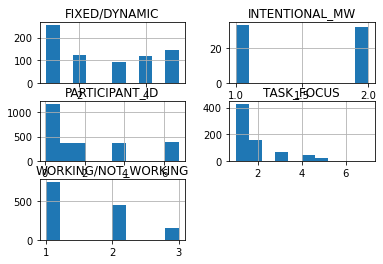

In [42]:
filteredDF.hist()